# Interpolation

## Generate data points

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

Modify $x$ and $y$ values by adding random numbers

In [3]:
npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list, correctFunction(x_list)])

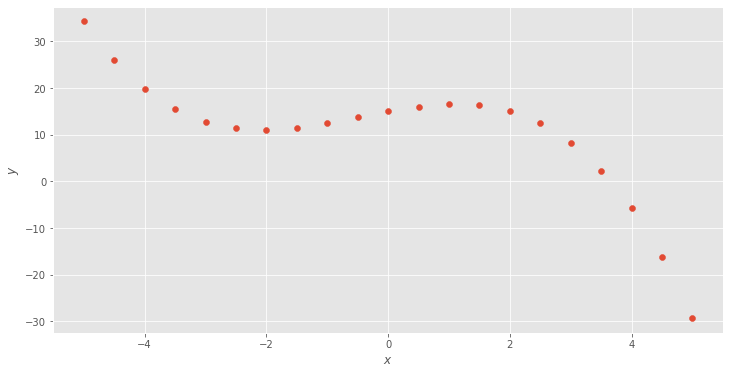

In [4]:
plt.figure(figsize=(12,6));
plt.scatter(data0[0], data0[1])
plt.xlabel('$x$');
plt.ylabel('$y$');

In [5]:
0.1 * (2*np.random.rand(npoints)-1)

array([-0.08788041,  0.0852695 ,  0.0748981 ,  0.03225166,  0.02189136,
        0.09131929, -0.09236955, -0.03154746,  0.04654644,  0.06388162,
       -0.0147616 ,  0.03257571, -0.07101812, -0.09401417, -0.04728862,
        0.05691458,  0.01301905,  0.00260401, -0.09538559,  0.05740612,
        0.00167378])

In [6]:
data = np.array([data0[0]+ 0.25 * (2*np.random.rand(npoints)-1), 
                 data0[1] + 5 * (2*np.random.rand(npoints)-1)])

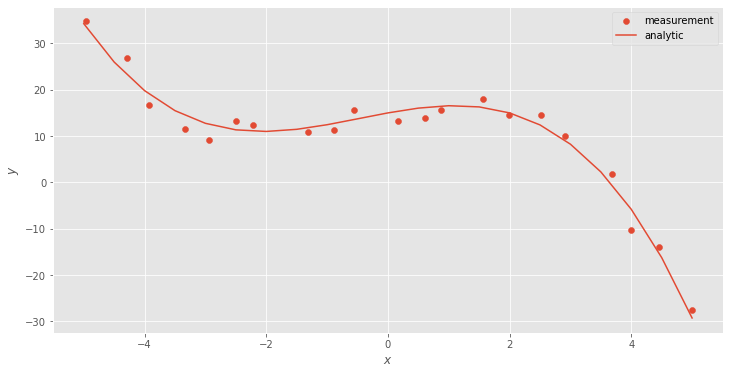

In [7]:
plt.figure(figsize=(12,6));
plt.scatter(data[0], data[1], label='measurement');
plt.plot(data0[0], data0[1], label='analytic');
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();

## Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### Unperturbed data

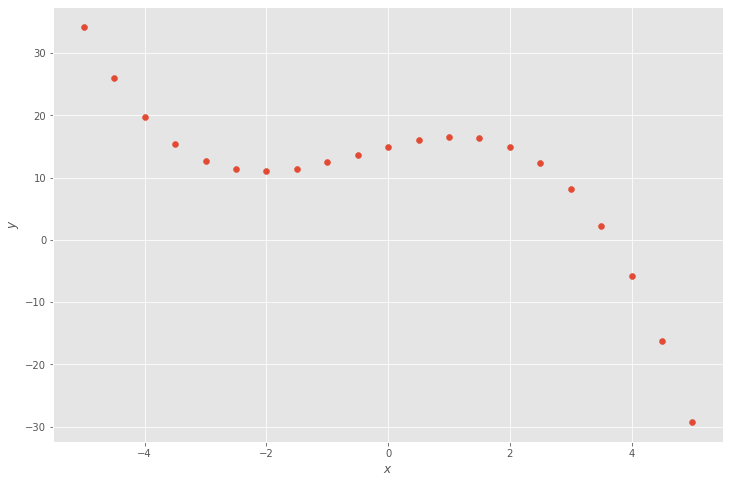

In [8]:
plt.figure(figsize=(12,8));
plt.scatter(data0[0], data0[1]);
plt.xlabel('$x$');
plt.ylabel('$y$');

In [9]:
from scipy import interpolate

* linear splines

In [10]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind='linear')

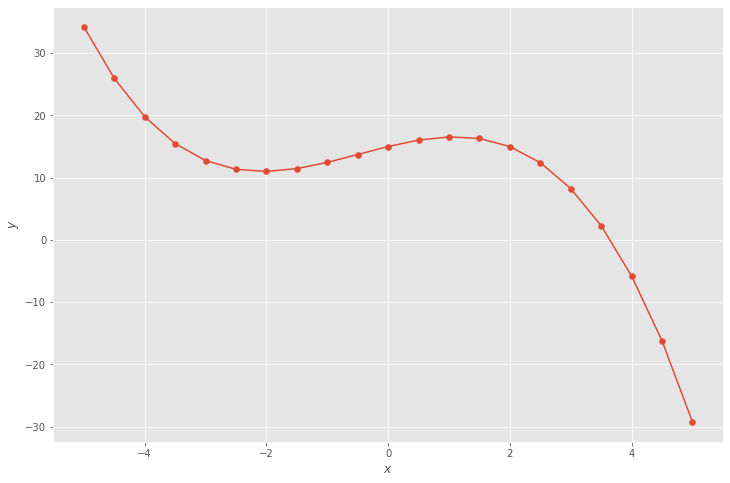

In [11]:
plt.figure(figsize=(12,8));
plt.scatter(data0[0], data0[1], label='true');
plt.plot(data0[0], splineLinear0(data0[0]))
plt.xlabel('$x$');
plt.ylabel('$y$');

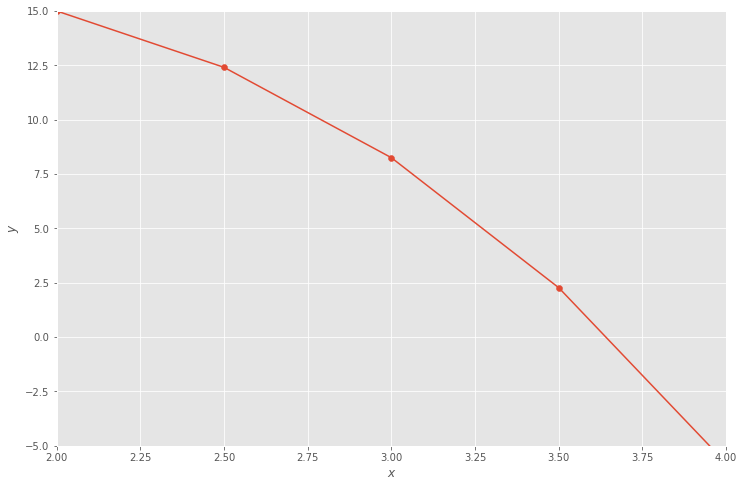

In [12]:
plt.figure(figsize=(12,8));

plt.scatter(data0[0], data0[1], label='true');

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list));
plt.xlim([2,4]);
plt.ylim([-5,15]);
plt.xlabel('$x$');
plt.ylabel('$y$');

* cubic spline

In [13]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind='cubic')

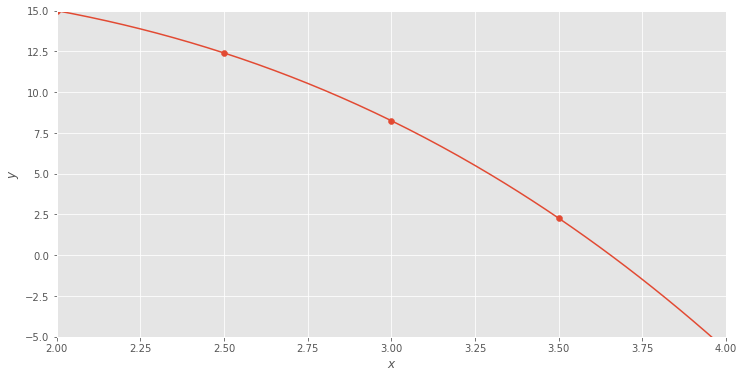

In [14]:
plt.figure(figsize=(12,6));

plt.scatter(data0[0], data0[1], label='true');

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list));
plt.xlim([2,4]);
plt.ylim([-5,15]);
plt.xlabel('$x$');
plt.ylabel('$y$');

## Perturbed data

In [15]:
splineCubic = interpolate.interp1d(data[0], data[1], kind='cubic')

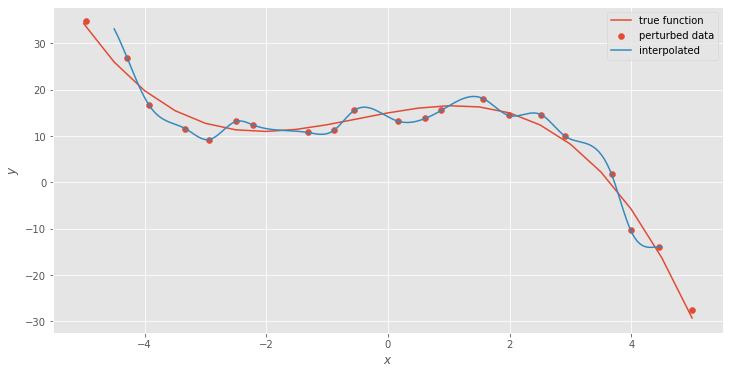

In [16]:
plt.figure(figsize=(12,6));
plt.plot(data0[0], data0[1], label='true function');

plt.scatter(data[0], data[1], label='perturbed data');

x_list = np.linspace(-4.5,4.5,201)
plt.plot(x_list, splineCubic(x_list), label='interpolated');

plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();

* How to handle data which is not smooth?

In [17]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)

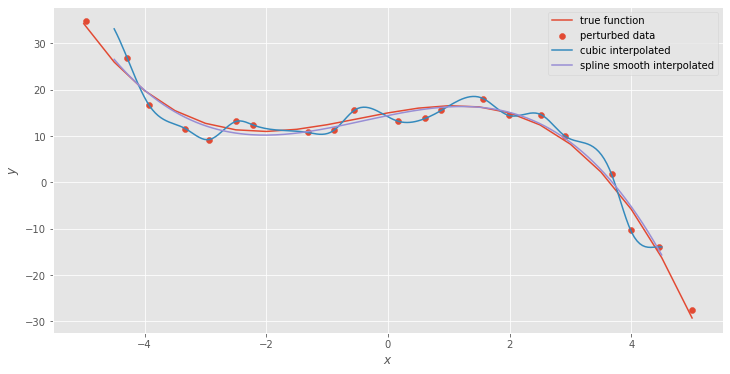

In [18]:
plt.figure(figsize=(12,6));
plt.plot(data0[0], data0[1], label='true function');

plt.scatter(data[0], data[1], label='perturbed data');

x_list = np.linspace(-4.5,4.5,201)
plt.plot(x_list, splineCubic(x_list), label='cubic interpolated');
plt.plot(x_list, splineSmooth(x_list), label='spline smooth interpolated');

plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();

## How we can always fit data with a polynomial

In [19]:
datapoly = data[:,7:14]

In [20]:
datapoly

array([[-1.3186159 , -0.88842904, -0.55216898,  0.1585154 ,  0.61450017,
         0.87829501,  1.56354747],
       [10.7760693 , 11.23738329, 15.55946481, 13.23476741, 13.81702778,
        15.5447296 , 18.10597357]])

We have 7 data points. That means we need a 6th order polynomial for the perfect interpolation:

$$
f(x) = a_{0} + a_{1}x + a_{2}x^{2} + a_{3}x^{3} + a_{4}x^{4} + a_{5}x^{5} + a_{6}x^{6}.
$$

This polynomial gives the correct value for all points $x_{i}, y_{i}$:

$$
y_{i} = a_{0} + a_{i}x_{i} + a_{2}x_{i}^{2} + a_{3}x_{i}^{3} + a_{4}x_{i}^{4} + a_{5}x_{i}^{5} + a_{6}x_{i}^{6}.
$$

We can express these 7 equations $(i = 0, \cdots, 6)$ as a matrix equation:

$$
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6 
\end{bmatrix} = \begin{bmatrix}
1 & x_0 & x_{0}^{2} & x_{0}^{3} & x_{0}^{4} & x_{0}^{5} & x_{0}^{6} \\
1 & x_1 & x_{1}^{2} & x_{1}^{3} & x_{1}^{4} & x_{1}^{5} & x_{1}^{6} \\
1 & x_2 & x_{2}^{2} & x_{2}^{3} & x_{2}^{4} & x_{2}^{5} & x_{2}^{6} \\
1 & x_3 & x_{3}^{2} & x_{3}^{3} & x_{3}^{4} & x_{3}^{5} & x_{3}^{6} \\
1 & x_4 & x_{4}^{2} & x_{4}^{3} & x_{4}^{4} & x_{4}^{5} & x_{4}^{6} \\
1 & x_5 & x_{5}^{2} & x_{5}^{3} & x_{5}^{4} & x_{5}^{5} & x_{5}^{6} \\
1 & x_6 & x_{6}^{2} & x_{6}^{3} & x_{6}^{4} & x_{6}^{5} & x_{6}^{6} 
\end{bmatrix} \begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
a_3 \\
a_4 \\
a_5 \\
a_6 
\end{bmatrix}
$$

The middle matrix is just a matrix of numbers that we can calculate

In [21]:
x = np.transpose(np.array([datapoly[0,:]**0, datapoly[0,:]**1,
             datapoly[0,:]**2, datapoly[0,:]**3,
             datapoly[0,:]**4, datapoly[0,:]**5,
             datapoly[0,:]**6]))

In [22]:
y = datapoly[1,:]

Now we can solve the system of linear (in $a_{i}$) equations. We use a numpy routine.

If you want to program this yourself: Gaussian elimination method.

For matrices: LU decomposition (lower-upper factorization of a matrix as the product of a lower triangular matrix and an upper triangular matrix).

In [23]:
a = np.linalg.solve(x,y)

In [24]:
a

array([14.05170218, -6.13759792,  3.93875584, 15.88961851, -9.05542301,
       -6.3310676 ,  3.87155966])

In [25]:
x_list = np.linspace(-2.5, 2.5, 901)
y_list = a[0]*x_list** 0 + a[1]*x_list** 1 + a[2]*x_list** 2 + a[3]*x_list** 3 + \
         a[4]*x_list** 4 + a[5]*x_list** 5 + a[6]*x_list** 6

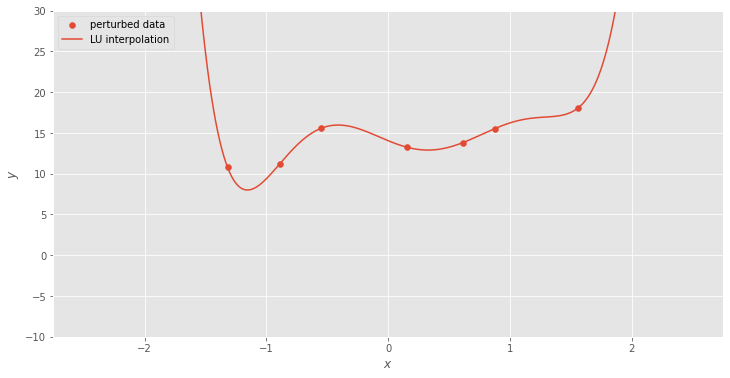

In [26]:
plt.figure(figsize=(12, 6));

plt.scatter(datapoly[0], datapoly[1], label='perturbed data');
plt.plot(x_list, y_list, label='LU interpolation');

plt.ylim([-10, 30]);
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();

## Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### Define a model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

In [27]:
def polynomialModel(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * x**k
    return t

In [62]:
a0 = np.array([15, 2.4, -0.5, -0.35])
x_list = np.linspace(-5, 5, npoints)

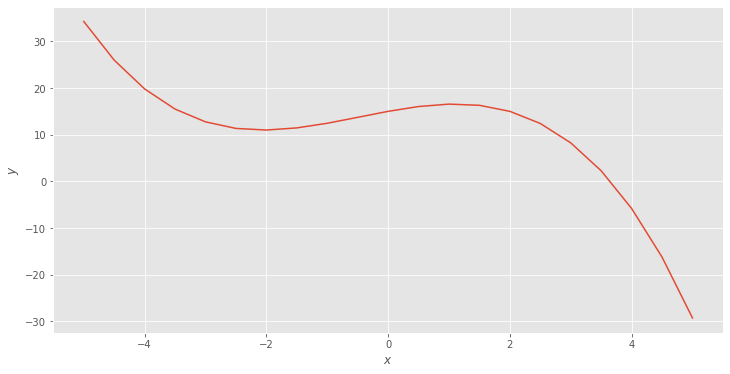

In [63]:
plt.figure(figsize=(12, 6));

plt.plot(x_list, polynomialModel(x_list, a0));
plt.xlabel('$x$');
plt.ylabel('$y$');

### Define error

There are many reasonable definitions of an error function, but a very common choice is:

$$
\Delta = \sum_{i=1}^{n}(y_{i} - f(x_{i}))^{2}
$$

* $f$: the fit function that is determined by the coefficients $a_i$ in our case,
* $(x_{i}, y_{i})$: the data points we try to fit

In [64]:
def errorFit(f, coeff, data):
    """
    f: the fit function
    coeff: ai that we try to optimize
    data: the data we try to fit
    """
    
    error = 0
    for i in range(len(data[0])):
        error = error + (data[1,i] - f(data[0,i], coeff))**2
        #print(error)
    return error 

In [65]:
errorFit(polynomialModel, a0, data)

103.9210472980568

### Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e.g. Monte-Carlo algorithm. Here we will use the gradient descent method. The coefficients $a_i$ will be updated along the gradient direction of the error function $\nabla_{\overrightarrow{a}}\Delta$. The gradient consists of elements:

\\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

In [66]:
def errorFitGradient(f, coeff, data):
    """
    f: the fit function
    coeff: ai that we try to optimize
    data: the data we try to fit
    """
    return -2 * np.array([
        np.sum(np.array([(data[1,i] - f(data[0,i], coeff)) * data[0,i]**k for i in range(len(data[0]))]))
        for k in range(len(coeff))])

In [67]:
errorFitGradient(polynomialModel, a0, data)

array([   2.80109743,  -23.41015989, -123.65639432, -138.53559195])

### Loop for actual fitting

In [68]:
iterations = 100000
h = 0.00001
a = 2*np.random.rand(4) - 1 # range : -1 to +1


for i in range(iterations):
    a = a - h * errorFitGradient(polynomialModel, a, data)  


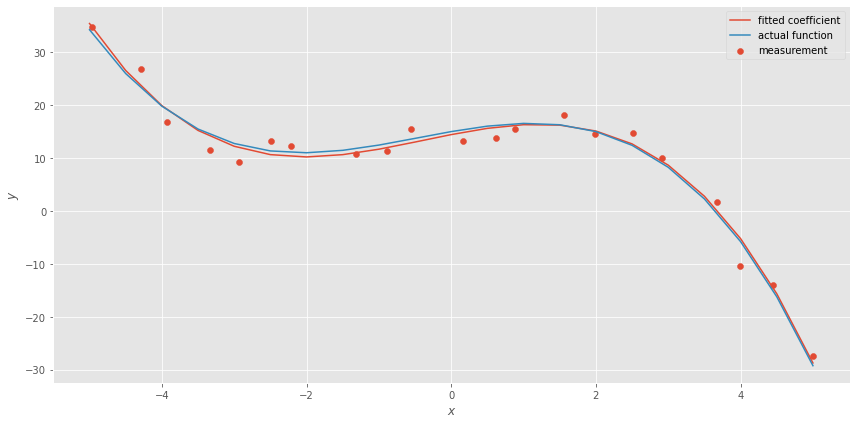

In [69]:
plt.figure(figsize=(12, 6));

plt.plot(x_list, polynomialModel(x_list, a), label='fitted coefficient');
plt.plot(x_list, polynomialModel(x_list, a0), label='actual function');
plt.scatter(data[0], data[1], label='measurement');

plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();
plt.tight_layout();

* comparison to a and a0

In [61]:
print(a)
print(a0)

[14.43027863  2.68001217 -0.44338081 -0.36386821]
[-2.    2.4  -0.5  -0.35]


In [72]:
print(errorFit(polynomialModel, a0, data))
print(errorFit(polynomialModel, a, data))

103.9210472980568
97.30551834363388
